In [6]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [7]:
import scipy.stats

In [8]:
# Create a data frame named as 'summer' including data from July and August 2015.
jul = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201507-citibike-tripdata.csv')
aug = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201508-citibike-tripdata.csv')
summer = pd.concat([jul, aug], axis = 0, ignore_index=True)

# Create a data frame named as 'Winter' including data from Jan and Feb 2015.
jan = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
feb = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201502-citibike-tripdata.csv')
winter = pd.concat([jan, feb], axis = 0, ignore_index=True)

In [9]:
#df is the dataframe where the content of the csv file is stored
summer['age'] = 2015-summer['birth year'][(summer['usertype'] == 'Subscriber')]
winter['age'] = 2015-winter['birth year'][(winter['usertype'] == 'Subscriber')]

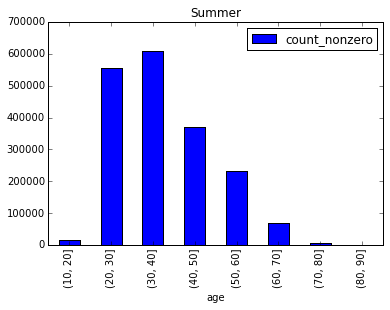

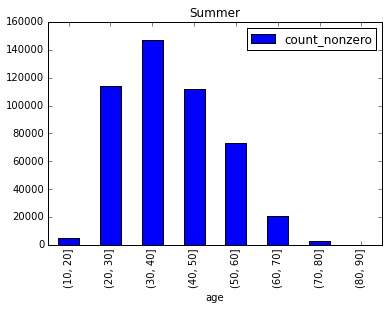

In [10]:
bins = np.arange(10, 99, 10)
summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
summer_age_dist = summer.age.groupby(pd.cut(summer.age, bins)).agg([count_nonzero])
winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
winter_age_dist = winter.age.groupby(pd.cut(winter.age, bins)).agg([count_nonzero])

In [12]:
#compare to normal

ksW=scipy.stats.kstest(winter_age_dist, 'norm')
ksS=scipy.stats.kstest(summer_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(winter_age_dist, 'cauchy')
ksS=scipy.stats.kstest(summer_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=0.99999783543649534, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.99999947822328306, pvalue=0.0)


In [22]:
#Compared to Anderson
print (winter_age_dist)

ageW = np.array([a for a in winter.age if not np.isnan(a)])
ageS = np.array([b for b in summer.age if not np.isnan(b)])



adW = scipy.stats.anderson(ageW, dist='norm')
adS = scipy.stats.anderson(ageS, dist='norm')
print "winter, normal fit", adW
print "summer, normal fit", adS

           count_nonzero
age                    
(10, 20]           4736
(20, 30]         113851
(30, 40]         147055
(40, 50]         111967
(50, 60]          73047
(60, 70]          20945
(70, 80]           2625
(80, 90]            115
winter, normal fit AndersonResult(statistic=4556.0239068368101, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=30342.689370448934, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
